In [41]:
import os
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
np.set_printoptions(threshold=sys.maxsize)

#gene_names = pd.read_csv("data/cancer_genes.csv", header = None)
mrna = pd.read_csv("data/mrna_515.csv")['Gene']

In [34]:
def average_pix(folder):
    c = np.zeros((122, 122))
    dir = os.listdir("tsne_images/mrna515_tsne_6_cosine/data_px/" + folder)
    for datafile in dir:
        a = np.load("tsne_images/mrna515_tsne_6_cosine/data_px/" + folder + '/' + datafile)
        c = c + a
    c = c/len(dir)
    return c

In [35]:
class_0_avg = average_pix("class_0")
class_1_avg = average_pix("class_1")
diff = np.subtract(class_1_avg, class_0_avg)
#diff_op = np.subtract(class_0_avg, class_1_avg)

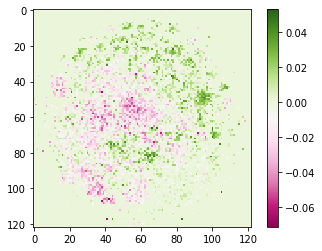

In [36]:
plot = plt.imshow(diff, cmap = 'PiYG', interpolation='None')
#plt.axis('off')
plt.colorbar()
plt.show()
#plot.save('diff.png')

In [ ]:
loc = np.nonzero(diff)
nonzero_row = loc[0]
nonzero_col = loc[1]

diff_pix = []
for row, col in zip(nonzero_row, nonzero_col):
    diff_pix.append((row, col))
    #print(row, col, diff[row, col])
    #print("A[{}, {}] = {}".format(row, col, diff[row, col]))

In [28]:
final_df = pd.read_csv('plots_515/tsne_6_cosine/data_finaldf/tsne_6___cosine.csv')
final_df = final_df.drop('c', axis =1)
final_df = pd.concat([final_df, color_idx], axis=1)
final_df.columns = ['a', 'b', 'c']
df = final_df.loc[final_df['c']>=2] 

In [ ]:
from PIL import Image
from matplotlib import cm
im_class_0 = Image.fromarray(np.uint8(cm.Greys(class_0_avg)*255))
im_class_1 = Image.fromarray(np.uint8(cm.Greys(class_1_avg)*255))
im_diff = Image.fromarray(np.uint8(cm.Greys(diff)*255))
#im_diff.save("diff.png")

In [20]:
# gene_coord_C = np.load('analysis/genecoord_C_pix.npy', allow_pickle=True)
idx_pathway = np.load('analysis/idx_C_pix.npy', allow_pickle=True)
gene_coord_C = np.load('analysis/genlist_C_pix.npy', allow_pickle=True)
gene_coord = np.load('analysis/genlist_pix.npy', allow_pickle=True)

In [24]:
for key, values in gene_coord_C.item().items():
    try:
        values[0] = idx_pathway[values[0]]
    except:
        pass
    try:
        values[1] = idx_pathway[values[1]]
    except:
        pass 

In [28]:
#Replace gene indices with gene names for every pixel coordinate
def replace(gene_dict, source):
    for key , value in gene_dict.item().items():
        for i in range(13):
            try:
                value[i] = source[value[i]]
            except:
                pass
    
    return gene_dict

In [29]:
gene_coord = replace(gene_coord, mrna)
gene_coord_C = replace(gene_coord_C, mrna)

In [31]:
for key, value in gene_coord.item().items():
    print(key, value)

2RY2']
(72, 77) ['P2RY6']
(29, 89) ['PA2G4']
(9, 72) ['PABPC1P2', 'PABPC1', 'PABPC3']
(47, 44) ['PACSIN2', 'POLDIP3', 'SREBF2']
(66, 74) ['PACSIN3', 'SSH3']
(89, 99) ['PAGE2B', 'PAGE2', 'PAGE3', 'PAGE5', 'RFPL4B', 'SSX1']
(79, 75) ['PAK1']
(77, 42) ['PALM', 'PRSSL1']
(33, 45) ['PANK3', 'PPP4R2', 'PPTC7', 'SBNO1']
(49, 80) ['PANK4', 'TMEM222']
(74, 98) ['PAQR7']
(29, 54) ['PARD6A', 'THAP11']
(17, 72) ['PARP2']
(76, 81) ['PART1']
(81, 36) ['PARVA', 'STON1', 'ZEB1']
(92, 79) ['PATE1']
(91, 75) ['PATE3', 'PTH', 'SLC17A2']
(99, 38) ['PATL2']
(101, 70) ['PAX2']
(44, 28) ['PBRM1', 'PDE12', 'RPP14', 'TOP2B']
(30, 57) ['PBX3']
(63, 61) ['PBX4', 'SLC9A3', 'STX1B']
(55, 43) ['PBXIP1']
(72, 38) ['PCA3', 'PRUNE2']
(77, 39) ['PCBP3', 'SCN3B']
(85, 62) ['PCDH7', 'PDLIM5', 'SEMA3C']
(60, 7) ['PCDHA10', 'PCDHA11', 'PCDHA12', 'PCDHA8', 'PCDHA9']
(59, 7) ['PCDHA13', 'PCDHAC1', 'PCDHAC2']
(61, 7) ['PCDHA1', 'PCDHA2', 'PCDHA3', 'PCDHA4', 'PCDHA5', 'PCDHA6', 'PCDHA7']
(64, 7) ['PCDHB13', 'PCDHB14', 'PCDHGA1

In [32]:
for key, value in gene_coord_C.item().items():
    print(key, value)

(33, 26) ['APC']
(72, 32) ['AR']
(44, 50) ['ASXL1']
(39, 57) ['ATM']
(40, 49) ['ATRX']
(52, 87) ['ATR']
(56, 81) ['AXIN1']
(90, 33) ['BCL2']
(48, 91) ['BRCA1']
(48, 93) ['BRCA2']
(48, 92) ['BRIP1']
(93, 28) ['BTK']
(29, 51) ['BTRC']
(42, 48) ['C11orf30']
(69, 49) ['CCND1']
(89, 31) ['CCND2']
(59, 26) ['CCND3']
(55, 93) ['CCNE1', 'EZH2']
(54, 98) ['CCNE2']
(38, 52) ['CDK12']
(33, 90) ['CDK2']
(49, 105) ['CDK4']
(77, 45) ['CDK6']
(52, 22) ['CDKN1B']
(36, 20) ['CDKN2A', 'CDKN2B']
(52, 101) ['CDKN2C']
(52, 95) ['CHEK1', 'FANCG']
(54, 96) ['CHEK2']
(27, 30) ['CSNK1A1']
(31, 27) ['CTNNA1', 'RAD50']
(56, 32) ['CTNNB1']
(66, 87) ['DNMT3A']
(51, 75) ['DOT1L']
(57, 74) ['DVL1']
(91, 41) ['ESR1']
(56, 94) ['FANCA']
(47, 93) ['FANCC']
(53, 91) ['FANCD2']
(37, 66) ['FANCE']
(52, 98) ['FANCF']
(45, 95) ['FANCL']
(82, 41) ['FZD1']
(51, 34) ['GNA11']
(52, 27) ['GNAQ']
(38, 46) ['GSK3B']
(70, 103) ['IDH1']
(59, 84) ['IDH2']
(91, 31) ['IKZF1']
(92, 29) ['IL7R']
(109, 44) ['IRF4']
(40, 41) ['KDM5A', 'LRP

In [33]:
np.save('analysis/genlist_with_coordinates.npy', gene_coord)
np.save('analysis/genlist_C_with_coordinated.npy', gene_coord_C)

In [123]:
# df_c = final_df.loc[final_df['c']>=2] 
# df_c.reset_index(level=0, inplace=True)
# for i, j in zip(df_c['index'], range(81)):
#         df_c['index'][j] = mrna[i]

In [49]:
diff_C = []
for key, value in gene_coord_C.item().items():
    print(key, value, ':', diff[key])

(33, 26) ['APC'] : -0.010557297021293321
(72, 32) ['AR'] : -0.012967126743952784
(44, 50) ['ASXL1'] : -0.0025997812072404702
(39, 57) ['ATM'] : 0.0060317775099917315
(40, 49) ['ATRX'] : 0.0
(52, 87) ['ATR'] : 0.0
(56, 81) ['AXIN1'] : -0.0036671125794004444
(90, 33) ['BCL2'] : 0.0
(48, 91) ['BRCA1'] : 0.01569304050481818
(48, 93) ['BRCA2'] : 0.017544927413328526
(48, 92) ['BRIP1'] : 0.025917665291575576
(93, 28) ['BTK'] : -0.02677161899458036
(29, 51) ['BTRC'] : 0.0
(42, 48) ['C11orf30'] : 0.0
(69, 49) ['CCND1'] : 0.004569844411105639
(89, 31) ['CCND2'] : -0.016964856286849406
(59, 26) ['CCND3'] : -0.010050505883240302
(55, 93) ['CCNE1', 'EZH2'] : 0.011459853746251247
(54, 98) ['CCNE2'] : -0.01179017759903045
(38, 52) ['CDK12'] : -0.010571504662621134
(33, 90) ['CDK2'] : 0.0
(49, 105) ['CDK4'] : 0.0
(77, 45) ['CDK6'] : 0.010685210187170308
(52, 22) ['CDKN1B'] : 0.01584840556675471
(36, 20) ['CDKN2A', 'CDKN2B'] : 0.0
(52, 101) ['CDKN2C'] : 0.0058100918423361625
(52, 95) ['CHEK1', 'FANCG'

In [92]:
def image_gen():
    c = np.zeros((122, 122))
    for key, value in gene_coord_C.item().items():
        print(key)
    return c

In [105]:
for key, value in gene_coord_C.item().items():
    c[key[0]][key[1]] = diff[key]
    #print('Done!')

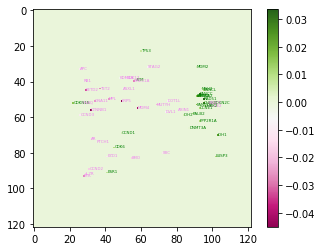

In [155]:
plot = plt.imshow(c, cmap = 'PiYG', interpolation='None')
#plt.axis('off')
for key, value in gene_coord_C.item().items():
    if diff[key] < 0:
        text = plt.text(key[1], key[0], value[0], fontsize=4, color = 'violet')
        #print(value[0])
    if diff[key] > 0:
        text = plt.text(key[1], key[0], value[0], fontsize=4, color = 'green')
        #print(value[0])
    #plt.annotate(value[0], xy=(key[0], key[1]), xytext=(key[0], key[1]), arrowprops=dict(facecolor='black', shrink=0.1, headwidth = 2, headlength = 2), fontsize = 5)
plt.colorbar()
plt.show()
#plot.save('diff.png')

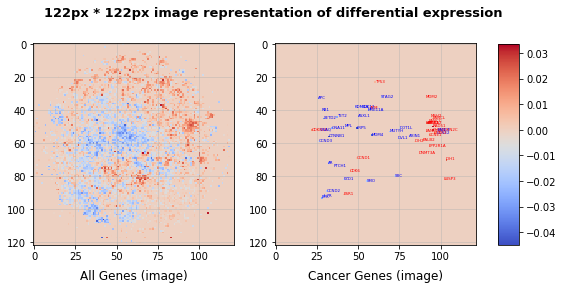

In [286]:

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('122px * 122px image representation of differential expression', x = 0.68, fontsize = 13, fontweight = 1000)

im = ax1.imshow(diff, cmap = 'coolwarm', interpolation='None')
im = ax2.imshow(c, cmap = 'coolwarm', interpolation='None')

for key, value in gene_coord_C.item().items():
    if diff[key] < 0:
        text = ax2.text(key[1], key[0], value[0], fontsize=4, color = 'blue')
        #print(value[0])
    if diff[key] > 0:
        text = ax2.text(key[1], key[0], value[0], fontsize=4, color = 'red')

ax1.set_title('All Genes (image)', y = -0.2)
ax2.set_title('Cancer Genes (image)', y = -0.2)
fig.subplots_adjust(right= 1.15)
cbar_ax = fig.add_axes([1.2, 0.15, 0.05, 0.7])
ax1.grid(which='minor', alpha=0.2)
ax1.grid(which='major', alpha=0.5)
ax2.grid(which='minor', alpha=0.2)
ax2.grid(which='major', alpha=0.5)
fig.colorbar(im, cax=cbar_ax)

In [329]:
from math import sqrt

In [388]:
r1 = []
r2 = []
for key, value in gene_coord.item().items():
     r1.append(key[0])
     r2.append(key[1])
all_genes = np.array([r1, r2]).T

In [389]:
r1 = []
r2 = []
for key, value in gene_coord_C.item().items():
     r1.append(key[0])
     r2.append(key[1])
genes_C = np.array([r1, r2]).T

In [375]:
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

In [414]:
# for data in all_genes:
#     print(euclidean_distance(data, all_genes[0]))

In [381]:
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	for train_row in train:
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors

In [410]:
neighbors = get_neighbors(all_genes, genes_C[23], 10)
for neighbor in neighbors:
	print(neighbor)

[52 38]
[52 68]
[52 32]
[52 85]
[52 59]
[52 94]
[52 69]
[52 75]
[52 29]
[52 42]


In [415]:
genes_C[23]

array([52, 22])